<a href="https://colab.research.google.com/github/choiseungmi/cat-vs-dog-classification/blob/master/Keras_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Connect drive with colab**

In [8]:
from google.colab import auth
auth.authenticate_user()

from google.colab import drive
drive.mount('/content/gdrive', force_remount=False)

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [9]:
import os
from pathlib import Path

folder = "Colab Notebooks"
project_dir = "cat_and_dog_classification"

base_path = Path("/content/gdrive/My Drive/")
project_path = base_path / folder / project_dir
os.chdir(project_path)
for x in list(project_path.glob("*")):
    if x.is_dir():
        dir_name = str(x.relative_to(project_path))
        os.rename(dir_name, dir_name.split(" ", 1)[0])
print(f"현재 디렉토리 위치: {os.getcwd()}")

현재 디렉토리 위치: /content/gdrive/My Drive/Colab Notebooks/cat_and_dog_classification


# **Decompression**

In [10]:
import zipfile
from pathlib import Path

current_path = Path().absolute()
data_path = current_path
print("현재 디렉토리 위치: {}".format(current_path))
if (data_path / "dogs-vs-cats").exists():
    print("이미 'data/my_cat_dog' 폴더에 압축이 풀려있습니다. 확인해보세요!")
else:
    with zipfile.ZipFile(str(data_path / "dogs-vs-cats.zip"), "r") as zip_ref:
        zip_ref.extractall(str(data_path / "dogs-vs-cats"))
    print("Done!")

if (data_path / "dogs-vs-cats"/ "train").exists():
    print("이미 'data/train' 폴더에 압축이 풀려있습니다. 확인해보세요!")
else:
    with zipfile.ZipFile(str(data_path / "dogs-vs-cats"/ "train.zip"), "r") as zip_ref:
        zip_ref.extractall(str(data_path / "dogs-vs-cats"))
    print("Done!")

if (data_path / "dogs-vs-cats"/ "test1").exists():
    print("이미 'data/train' 폴더에 압축이 풀려있습니다. 확인해보세요!")
else:
    with zipfile.ZipFile(str(data_path / "dogs-vs-cats"/ "test1.zip"), "r") as zip_ref:
        zip_ref.extractall(str(data_path / "dogs-vs-cats"))
    print("Done!")

현재 디렉토리 위치: /content/gdrive/My Drive/Colab Notebooks/cat_and_dog_classification
이미 'data/my_cat_dog' 폴더에 압축이 풀려있습니다. 확인해보세요!
이미 'data/train' 폴더에 압축이 풀려있습니다. 확인해보세요!
이미 'data/train' 폴더에 압축이 풀려있습니다. 확인해보세요!


# **Import Package**

In [0]:
%tensorflow_version 1.x
import sys
import warnings
warnings.filterwarnings('ignore') #  Warning massage ignore
import numpy as np
import pandas as pd # Dataframe
from keras.preprocessing.image import ImageDataGenerator, load_img
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import random
import os

# **Define Hyperparameter**

In [0]:
# Define hyperparameter
FAST_RUN=False
image_width=224
image_height=224
image_size=(224,224)
image_channels=3
batch_size=15
data_dir='./dogs-vs-cats'

# **Preparing Data**
*   Generate Train and Validation data frame
*   Data amplification



In [0]:
# Generate dataframe 
filenames=os.listdir(data_dir+'/train')
categories=[]

for filename in filenames:
  category=filename.split('.')[0]
  if category=='dog':
    categories.append(1)
  else:
    categories.append(0)

df=pd.DataFrame({
    'filename':filenames,
    'label':categories
})

In [0]:
# convert dataframe_label to string
df['label'] = df['label'].replace({0:'cat', 1:'dog'})

In [0]:
# Separate Train-Validation data
train_df, validate_df=train_test_split(df, test_size=0.20, random_state=42)
train_df=train_df.reset_index(drop=True)
validate_df=validate_df.reset_index(drop=True)

In [16]:
# Train Generator(Data amplification)
train_datagen=ImageDataGenerator(
    rotation_range=15,
    rescale=1./255,
    shear_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True,
    width_shift_range=0.1,
    height_shift_range=0.1
)

train_generator=train_datagen.flow_from_dataframe(
    train_df,
    data_dir+'/train/',
    x_col='filename',
    y_col="label",
    # subset="training",
    # seed=42,
    # shuffle=True,
    target_size=image_size,
    class_mode="binary",
    batch_size=batch_size
)

Found 20000 validated image filenames belonging to 2 classes.


In [17]:
# Validation Generator(Data amplification)
validation_datagen=ImageDataGenerator(rescale=1./255)
validation_generator=validation_datagen.flow_from_dataframe(
    validate_df,
    data_dir+'/train/',
    x_col='filename',
    y_col='label',
    target_size=image_size,
    class_mode='binary',
    batch_size=batch_size,
    # seed=42,
    # shuffle=True,
    # subset="validation"
)

Found 5000 validated image filenames belonging to 2 classes.


# **Implement the CNN model**

In [18]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization

model=Sequential()

# 4 Convolutinal Layers + Pooling Layers
# dropout 25%
# Use zero padding
model.add(Conv2D(32,(7,7),activation='relu', padding='same',input_shape=(image_width, image_height, image_channels)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64,(3,3),activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128,(3,3),activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128,(3,3),activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))

# 2 Fully-Connected Layer
model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()













Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 224, 224, 32)      4736      
_________________________________________________________________
batch_normalization_1 (Batch (None, 224, 224, 32)      128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 112, 112, 32)      0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 112, 112, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 112, 112, 64)      18496     
_____________________________

# **Generate Callback Function**


*   Early stop
*   Learning rate reduction



In [0]:
#Callbacks
from keras.callbacks import EarlyStopping, ReduceLROnPlateau # importing Earlystop, Learning Rate Reduction

In [0]:
# Early Strop to prevent over fitting
# Stop the learning after 10 epochs and val_loss value not decreased
earlystop=EarlyStopping(patience=10)

In [0]:
# Learning Rate Reduction
# Reduce the learning rate when the accuracy not increase for 3 steps
learning_rate_reduction=ReduceLROnPlateau(monitor='val_acc',
                                          patience=3,
                                          verbose =1,
                                          factor=0.5,
                                          min_lr=0.00001)
# Lower bound on the learning rate : 1e-05

In [0]:
# Declare Callbacks 
callbacks=[earlystop, learning_rate_reduction]

# **Training**

In [24]:
# Start learning
# Fit model
STEP_TRAIN=train_generator.n//train_generator.batch_size
STEP_VALID=validation_generator.n//validation_generator.batch_size

epochs=3 if FAST_RUN else 50
history=model.fit_generator(
    generator=train_generator,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=STEP_VALID,
    steps_per_epoch=STEP_TRAIN,
    callbacks=callbacks
)

Epoch 1/50
1333/1333 [==============================] - 325s 244ms/step - loss: 0.5844 - acc: 0.6903 - val_loss: 0.5605 - val_acc: 0.7139
Epoch 2/50
1333/1333 [==============================] - 321s 241ms/step - loss: 0.5425 - acc: 0.7260 - val_loss: 0.4862 - val_acc: 0.7641
Epoch 3/50
1333/1333 [==============================] - 321s 241ms/step - loss: 0.5103 - acc: 0.7516 - val_loss: 0.5105 - val_acc: 0.7517
Epoch 4/50
1333/1333 [==============================] - 320s 240ms/step - loss: 0.4655 - acc: 0.7793 - val_loss: 0.4929 - val_acc: 0.7817
Epoch 5/50
1333/1333 [==============================] - 316s 237ms/step - loss: 0.4393 - acc: 0.7934 - val_loss: 0.4027 - val_acc: 0.8146
Epoch 6/50
1333/1333 [==============================] - 314s 236ms/step - loss: 0.4205 - acc: 0.8052 - val_loss: 0.4067 - val_acc: 0.8156
Epoch 7/50
1333/1333 [==============================] - 314s 236ms/step - loss: 0.3936 - acc: 0.8231 - val_loss: 0.3576 - val_acc: 0.8419
Epoch 8/50
1333/1333 [============

In [0]:
# Save the Model
model.save_weights("model.h5")

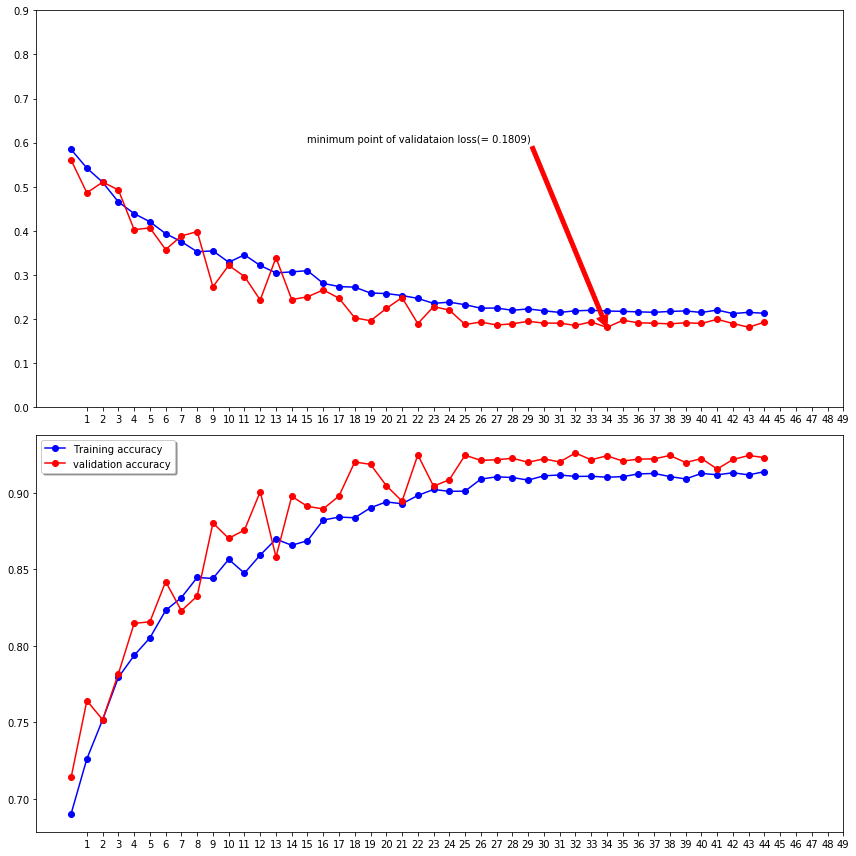

In [38]:
# Virtualize Training
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(12,12))
ax1.plot(history.history['loss'], color='b', label="Training loss", marker="o")
ax1.plot(history.history['val_loss'], color='r', label="validation loss", marker="o")
ax1.set_xticks(np.arange(1, epochs, 1))
ax1.set_yticks(np.arange(0, 1, 0.1))
ax1.annotate('minimum point of validataion loss(= 0.1809)',xy=(34, 0.1809), xytext=(15, 0.6), arrowprops={'color':'red'})

ax2.plot(history.history['acc'], color='b', label="Training accuracy", marker="o")
ax2.plot(history.history['val_acc'], color='r', label="validation accuracy", marker="o")
ax2.set_xticks(np.arange(1, epochs, 1))


legend=plt.legend(loc='best', shadow=True)
plt.tight_layout()
plt.show()

# **Testing**

In [0]:
# Prepare Testing
test_filenames=os.listdir(data_dir+'/test1/')
test_df=pd.DataFrame({
    'filename':test_filenames
})
np_samples=test_df.shape[0]

In [31]:
# Test Generator(Data amplification)
test_datagen=ImageDataGenerator(rescale=1./255)
test_generator=test_datagen.flow_from_dataframe(
    test_df,
    data_dir+'/test1',
    x_col='filename',
    y_col=None,
    target_size=image_size,
    class_mode=None,
    batch_size=batch_size,
    shuffle=False
)

Found 1597 validated image filenames.


In [32]:
# Predict
# The results of the prediction contains the probability for each record(cat and dog probability)
STEP_TEST=np.ceil(test_generator.n/test_generator.batch_size)
test_generator.reset()
predict=model.predict_generator(test_generator, verbose=1, steps=STEP_TEST)

107/107 [==============================] - 654s 6s/step


In [0]:
# Replace the value by selecting the label with the greater of the dog or cat probability
predicted_class_indices=(predict > 0.5)*1
predicted_class_indices=[y for x in predicted_class_indices for y in x]

labels = (train_generator.class_indices)
labels = dict((v,k) for k,v in labels.items())

predictions = [labels[k] for k in predicted_class_indices]


test_df = pd.DataFrame({
    'filename':test_filenames,
    'label': predictions})


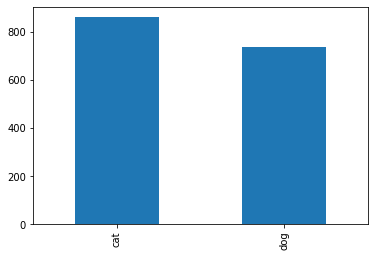

In [34]:
# Expected test value
test_df['label'].value_counts().plot.bar()

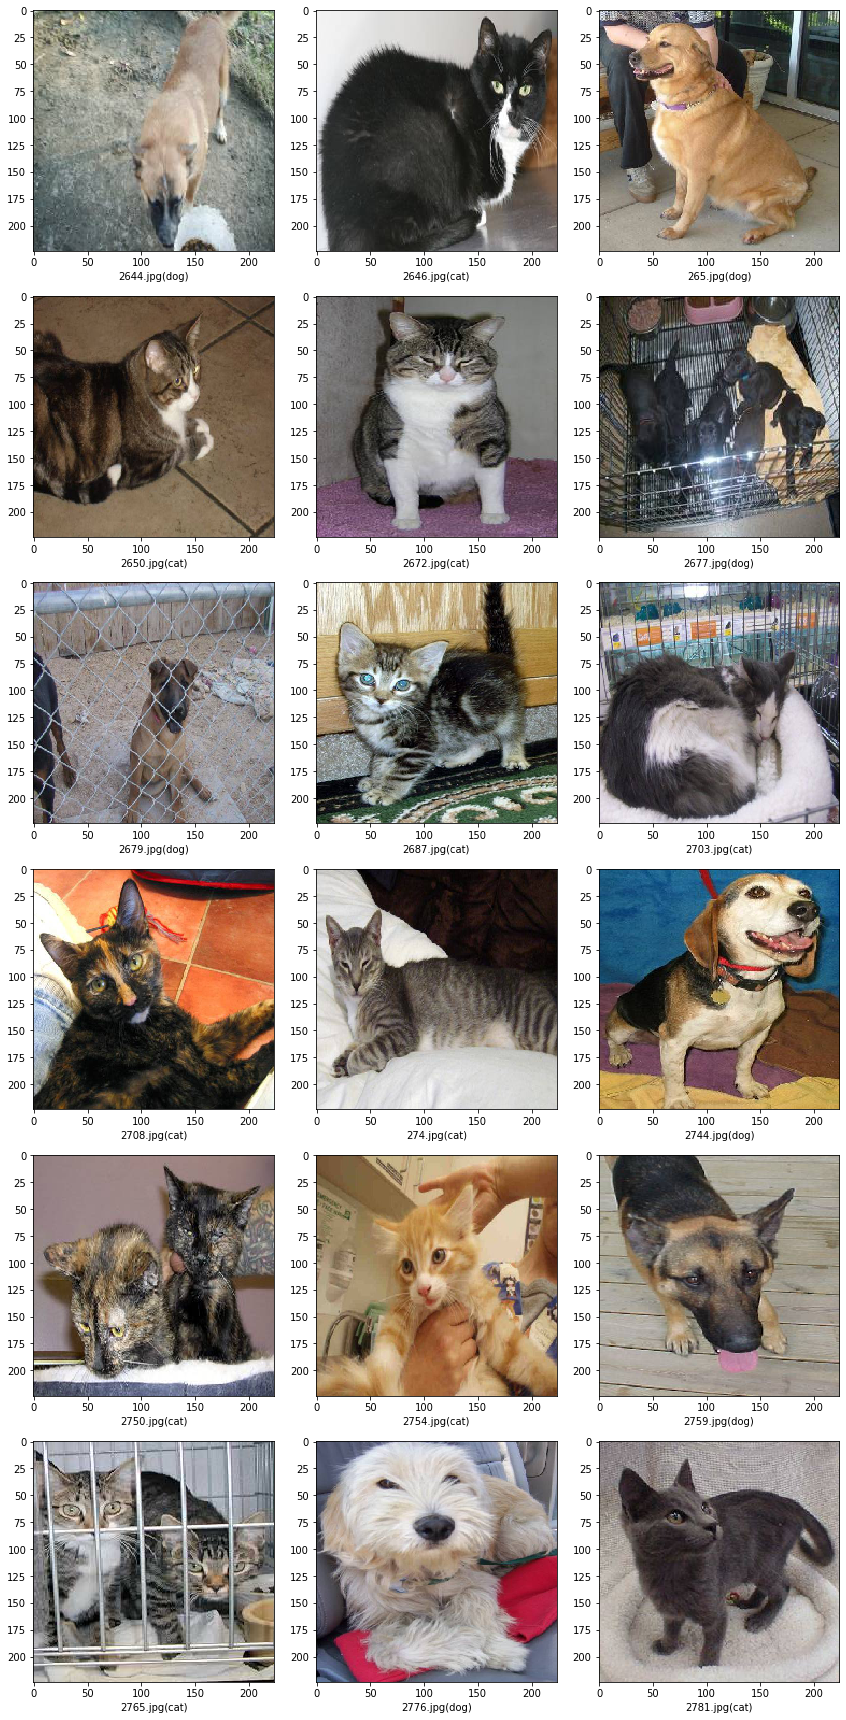

In [35]:
# Test the model by selecting 18 of test data(test_df)
# if you want random data, add the following code:
# test_df = test_df.sample(frac=1).reset_index(drop=True)
sample_test=test_df.head(18)
sample_test.head()
plt.figure(figsize=(12,24))
for index, row in sample_test.iterrows():
  filename=row['filename']
  category=row['label']
  img=load_img(data_dir+'/test1/'+filename, target_size=image_size)
  plt.subplot(6,3,index+1)
  plt.imshow(img)
  plt.xlabel(filename+'({})'.format(category))
plt.tight_layout()
plt.show()